In [1]:
#standard imports
import pandas as pd
import numpy as np
from scipy import stats
import env

import matplotlib.pyplot as plt

In [ ]:
# The average battery life for a fully charges iphone-12 is 14 hours with standard deviation of 1.5 hour

# What kind of probability distribution represents the random variable "battery life in hours"? continous normal distribution
# What are the appropriate defining parameters for this distribution? 14 and 1.5 
# Create a Scipy object/instance for this distribution
# Use the object create above and choose appropriate method (e.g. pmf, cdf, ppf etc.) to calculate the following:
#  a. What is the probability the cell phone battery more than 16 hours.  
#  b. What is probability that cell phone battery lasts for exactly 12 hours.  
#  c. What is the probability that cell phone battery lasts for 12 hours or less.  
#  d. How many hours do the battery lasts for top 25% longest lasting phones.   

In [ ]:
mean = 14
sd = 1.5

In [ ]:
cell_dist = stats.norm(mean, sd)

In [ ]:
cell_dist.sf(16)

In [ ]:
cell_dist.pdf(12)

In [ ]:
cell_dist.cdf(12)

In [ ]:
cell_dist.isf(1/4)

In [ ]:
# # A bank found that the average number of cars waiting during the noon hour at a drive-up window 
# follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer 
# these questions concerning the probability of cars waiting at the drive-up window.

In [2]:
# # What is the probability that no cars drive up in the noon hour?

In [3]:
#  μ = \mu + `tab`

SyntaxError: cannot assign to operator (3368825338.py, line 1)

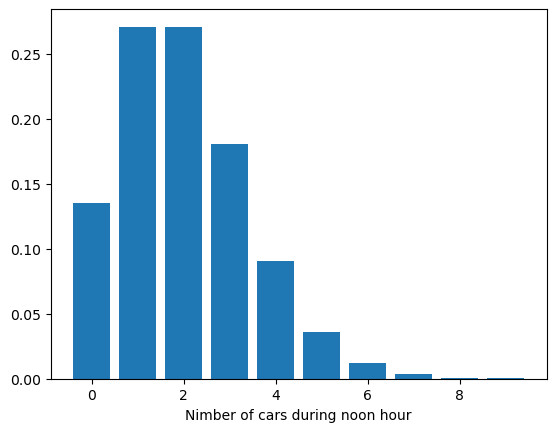

In [14]:
mean = 2
x = np.arange(0,10)
y = stats.poisson(mean).pmf(x)
plt.xlabel("Nimber of cars during noon hour")

plt.bar(x,y)
plt.show()

In [16]:
stats.poisson.pmf(0, mean)

0.1353352832366127

In [17]:
 # # What is the probability that 3 or more cars come through the drive through? 0.32

In [18]:
stats.poisson.sf(2, mean)

0.32332358381693654

In [19]:
# # How likely is it that the drive through gets at least 1 car? 0.86

In [21]:
stats.poisson.sf(0, mean)

0.8646647167633873

In [22]:
############ Grades of State University graduates are normally distributed with a mean of 3.0 
# and a standard deviation of .3. Calculate the following: 3.49

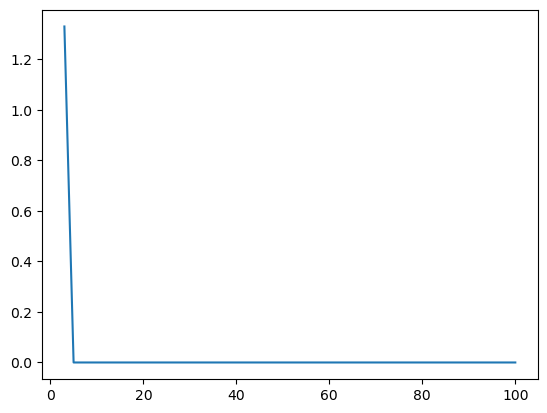

In [44]:
u_mean = 3
u_sd = .3
grade = stats.norm(u_mean, u_sd)

x = np.linspace(u_mean - 4*u_sd + 4*u_sd, 100)
y = grade.pdf(x)

plt.plot(x,y)

In [45]:
grade.isf(0.05)

3.4934560880854417

In [46]:
# What GPA constitutes the bottom 15% of the class? 2.69

In [47]:
grade.ppf(.15)

2.689069983151863

In [48]:
# An eccentric alumnus left scholarship money for students in the third decile from 
# the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average 
# qualify for this scholarship?

In [49]:
Z_20 = stats.norm.ppf(.2)
Z_30 = stats.norm.ppf(.3)

In [51]:
x_20 = u_mean * Z_20 * u_sd 
x_30 = u_mean * Z_30 * u_sd 
gpa_range = (x_20, x_30)


In [53]:
range_of_gpas = grade.ppf([.2, .3])

In [54]:
(range_of_gpas[0] < 2.8) and (range_of_gpas[1] > 2.8)

True

In [55]:
# If I have a GPA of 3.5, what percentile am I in? 95th 

In [56]:
grade.cdf(3.5)

0.9522096477271853

In [57]:
# A marketing website has an average click-through rate of 2%. 
# One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people 
# or more click through?

- probablity: succes rate pf 2%
- n_trials : 4326 visitors

In [58]:
n_trails = 4326
p = 0.02

click_throughs = stats.binom(n_trails, p)

# discrete value include 96
click_throughs.sf(96)

0.13975823631416445

In [ ]:
# Scott's way

In [59]:
1 - click_throughs.cdf(96)

0.1397582363141645

In [60]:
#sim

In [66]:
click = np.random.choice([0,1],(100_000, 4326), p= [.98, .02])

In [67]:
click

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [68]:
(click.sum(axis=1)>96).mean()

0.13971

In [69]:
#4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability
# rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to 
# each question.
# What is the probability that at least one of your first 60 answers is correct? 

In [73]:
trails = 60 # first 60 questions
p1 = 0.01 # 1/100 b'c it's random Number between 0 & 1

stats_hmwk = stats.binom(trails,p1)



In [74]:
stats_hmwk.sf(0)

0.45284335760923855

In [75]:
# 5. The codeup staff tends to get upset when the student break area is not cleaned up. 
# Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, 
# on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
# How likely is it that the break area gets cleaned up each day?  0.83
# 2 days 2.7
# How likely is it that it goes two days without getting cleaned up? All week? 0.013

In [76]:
n_students = round(.9 * 66)
p = 0.03

In [79]:
clean = stats.binom(n_students, p)

In [80]:
clean.sf(0)

0.8342199288437352

In [83]:
n = n_students * 2
p = 0.03
not_clean_2 = stats.binom(n, p) 

In [84]:
not_clean_2.pmf(0)

0.027483031992576134

In [87]:
n = n_students * 5
p = 0.03
not_clean_5 = stats.binom(n, p) 

In [90]:
round(not_clean_5.pmf(0), 5) * 100

0.013

In [91]:
# 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
# After several weeks of careful observation, you notice that the average number of people in line when your 
# lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 
# If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 
# what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? 
# Assume you have one hour for lunch, and ignore travel time to and from La Panaderia. 69.1%

In [92]:
avg_cust = 15 * 2
sd_cust = 3 * 2
total_lunchtime = 60
eat_time = 15
order_time = 2
cook_time = 10
max_wait = (total_lunchtime - eat_time) - order_time - cook_time
max_wait

33

In [93]:
stats.norm(avg_cust, sd_cust).cdf(max_wait)

0.6914624612740131

In [ ]:
# use people instead of time
avg_cust2 = 15
sd_cust2 = 3
wait_time = 33

stats.norm(avg_cust2, sd_cust2).cdf(16.5)

In [94]:
# 7. Connect to the employees database and find the average salary of current employees, 
# along with the standard deviation. For the following questions, calculate the answer based on 
# modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation 
# then compare this answer to the actual values present in the salaries dataset.



In [95]:
employee_sal = pd.read_sql("select e.emp_no, s.salary from employees as e join salaries as s on s.emp_no = e.emp_no where s.to_date > curdate()",env.get_db_url("employees"))

In [96]:
sd_sal = employee_sal.std()
sd_sal = sd_sal[1]
avg_sal = employee_sal.mean()
avg_sal = avg_sal[1]

In [ ]:
# What percent of employees earn less than 60,000? 0.24

In [97]:
stats.norm(avg_sal, sd_sal).cdf(60_000)

0.24385742480214434

In [98]:
# What percent of employees earn more than 95,000? 0.09

In [100]:
stats.norm(avg_sal, sd_sal).sf(95_000)

0.09208819199804058

In [ ]:
# What percent of employees earn between 65,000 and 80,000? 0.33

In [101]:
(stats.norm(avg_sal, sd_sal).cdf(80_000)) - (stats.norm(avg_sal, sd_sal).cdf(65_000))

0.33506056854466654

In [102]:
np.diff(stats.norm(avg_sal, sd_sal).cdf([65_000, 80_000]))

array([0.33506057])

In [104]:
(1 - stats.norm(avg_sal, sd_sal).cdf(65000)) - (stats.norm(avg_sal, sd_sal).sf(80_000))

0.3350605685446666

In [103]:
# What do the top 5% of employees make? 100484.64

In [105]:
stats.norm(avg_sal, sd_sal).isf(0.05)

100484.64454102777